<a href="https://colab.research.google.com/github/gabrielabura/WEEK-4-CORE-IP/blob/master/Copy_of_Moringa_Data_Science_Core_W4_Independent_Project_2020_05_Gabriel_Abura_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXPLORATORY DATA ANALYSIS


## 1. Defining the question

## a) Specifying the data analytic question
Investing a claim about the blue cars from our Autolib dataset

## b) Defining our metric for succes

## c) Understanding the context

## d) Recording the eperimental design

## e) Data relevance
The data provided is suitable to give the full analysis and output that we need. It is therefore very relevant for this study.



In [32]:
import pandas as pd

Variables = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
Variables.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


## 2) Reading the Data

In [0]:
# Here we load our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [0]:
# Load our dataset from the source

autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

## 3. Checking the Data

In [35]:
# Determining number of records in our dataset
autolib.shape

(16085, 13)

In [36]:
# previewing the top of our dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [37]:
# previewin the bottom
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [38]:
# Checking whether each column has an appropriate datatype
#
autolib.dtypes


Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 4) Tidying our dataset

In [39]:
# Checking for duplicates
autolib.duplicated().any()

False

In [40]:
# Identifying the missing data
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
# Dealing with missing data
# As we can see from the above cell there was none

In [42]:
# renaming columns
auto_lib = autolib.rename(columns={'Postal code':'Postal_code','dayofweek':'day_of_week'})
auto_lib.head(10)

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


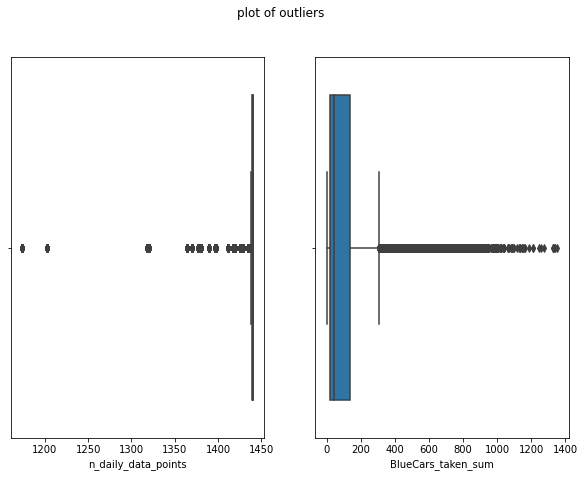

In [43]:
# Checking for outliers
#
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('plot of outliers')
sns.boxplot(auto_lib['n_daily_data_points'],ax=ax1)
sns.boxplot(auto_lib['BlueCars_taken_sum'], ax=ax2)



In [44]:
# Checking for anomalies
q1 = auto_lib.quantile(.25)
q3 = auto_lib.quantile(.75)

iqr =q3 -q1
print(iqr)

Postal_code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


## 6) Exploratory Data Analysis

1) Univarient Data anlaysis

In [45]:
# with the description below we can see the summary analysis of the integer columns
# This table shows the measures of central tendency (mode, median, mean, standard deviation, minimum ^ maximumvalue, ) for a set of data.

auto_lib.describe()


,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [46]:
# mode
print('BlueCars_taken_sum mode',auto_lib['BlueCars_taken_sum'].mode())
print('BlueCars_returned_sum mode',auto_lib['BlueCars_returned_sum'].mode())

BlueCars_taken_sum mode 0    12
dtype: int64
BlueCars_returned_sum mode 0    13
dtype: int64


In [47]:
# Median
print('BlueCars_taken_sum median',auto_lib['BlueCars_taken_sum'].median())
print('BlueCars_returned_sum median',auto_lib['BlueCars_returned_sum'].median())

BlueCars_taken_sum median 46.0
BlueCars_returned_sum median 46.0


Pie Charts

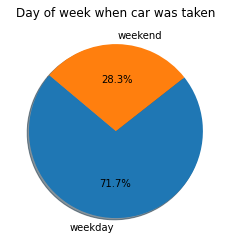

In [48]:
# Ploting the univariate summaries and recording our observations
#
size = auto_lib.groupby(['day_type'])['n_daily_data_points'].sum()
status = ['weekday','weekend']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Day of week when car was taken')
plt.show()

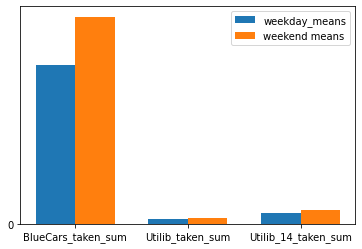

In [49]:
# For the bars to show the number of cars taken
cartype = ['BlueCars_taken_sum','Utilib_taken_sum','Utilib_14_taken_sum']
dataset = auto_lib.groupby('day_type')[cartype].mean()
weekday_means = list(dataset.T['weekday'])
weekend_means = list(dataset.T['weekend'])


indx = np.arange(len(cartype))
cartypelabel = np.arange(0,10,110)
barwidth = 0.35

fig, ax = plt.subplots()
barweekday = ax.bar(indx - barwidth/2, weekday_means , barwidth , label = 'weekday_means')
barweekend = ax.bar(indx + barwidth/2, weekend_means, barwidth , label = 'weekend means')

ax.set_xticks(indx)
ax.set_xticklabels(cartype)

ax.set_yticks(cartypelabel)
ax.set_yticklabels(cartypelabel)

ax.legend()

plt.show()

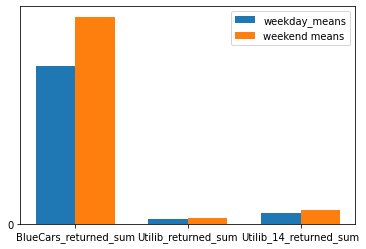

In [50]:
# Graph to see the cars returned 

cartype = ['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum']
dataset = auto_lib.groupby('day_type')[cartype].mean()
weekday_means = list(dataset.T['weekday'])
weekend_means = list(dataset.T['weekend'])


indx = np.arange(len(cartype))
cartypelabel = np.arange(0,10,110)
barwidth = 0.35

fig, ax = plt.subplots()
barweekday = ax.bar(indx - barwidth/2, weekday_means , barwidth , label = 'weekday_means')
barweekend = ax.bar(indx + barwidth/2, weekend_means, barwidth , label = 'weekend means')

ax.set_xticks(indx)
ax.set_xticklabels(cartype)

ax.set_yticks(cartypelabel)
ax.set_yticklabels(cartypelabel)

ax.legend()

plt.show()

Bivarient Analysis

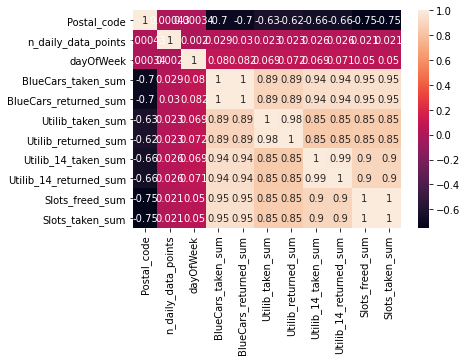

In [52]:
# Ploting the bivariate summaries and recording our observations
sns.heatmap(auto_lib.corr(),annot=True)
plt.show()

# we cant get a clear show but thats it

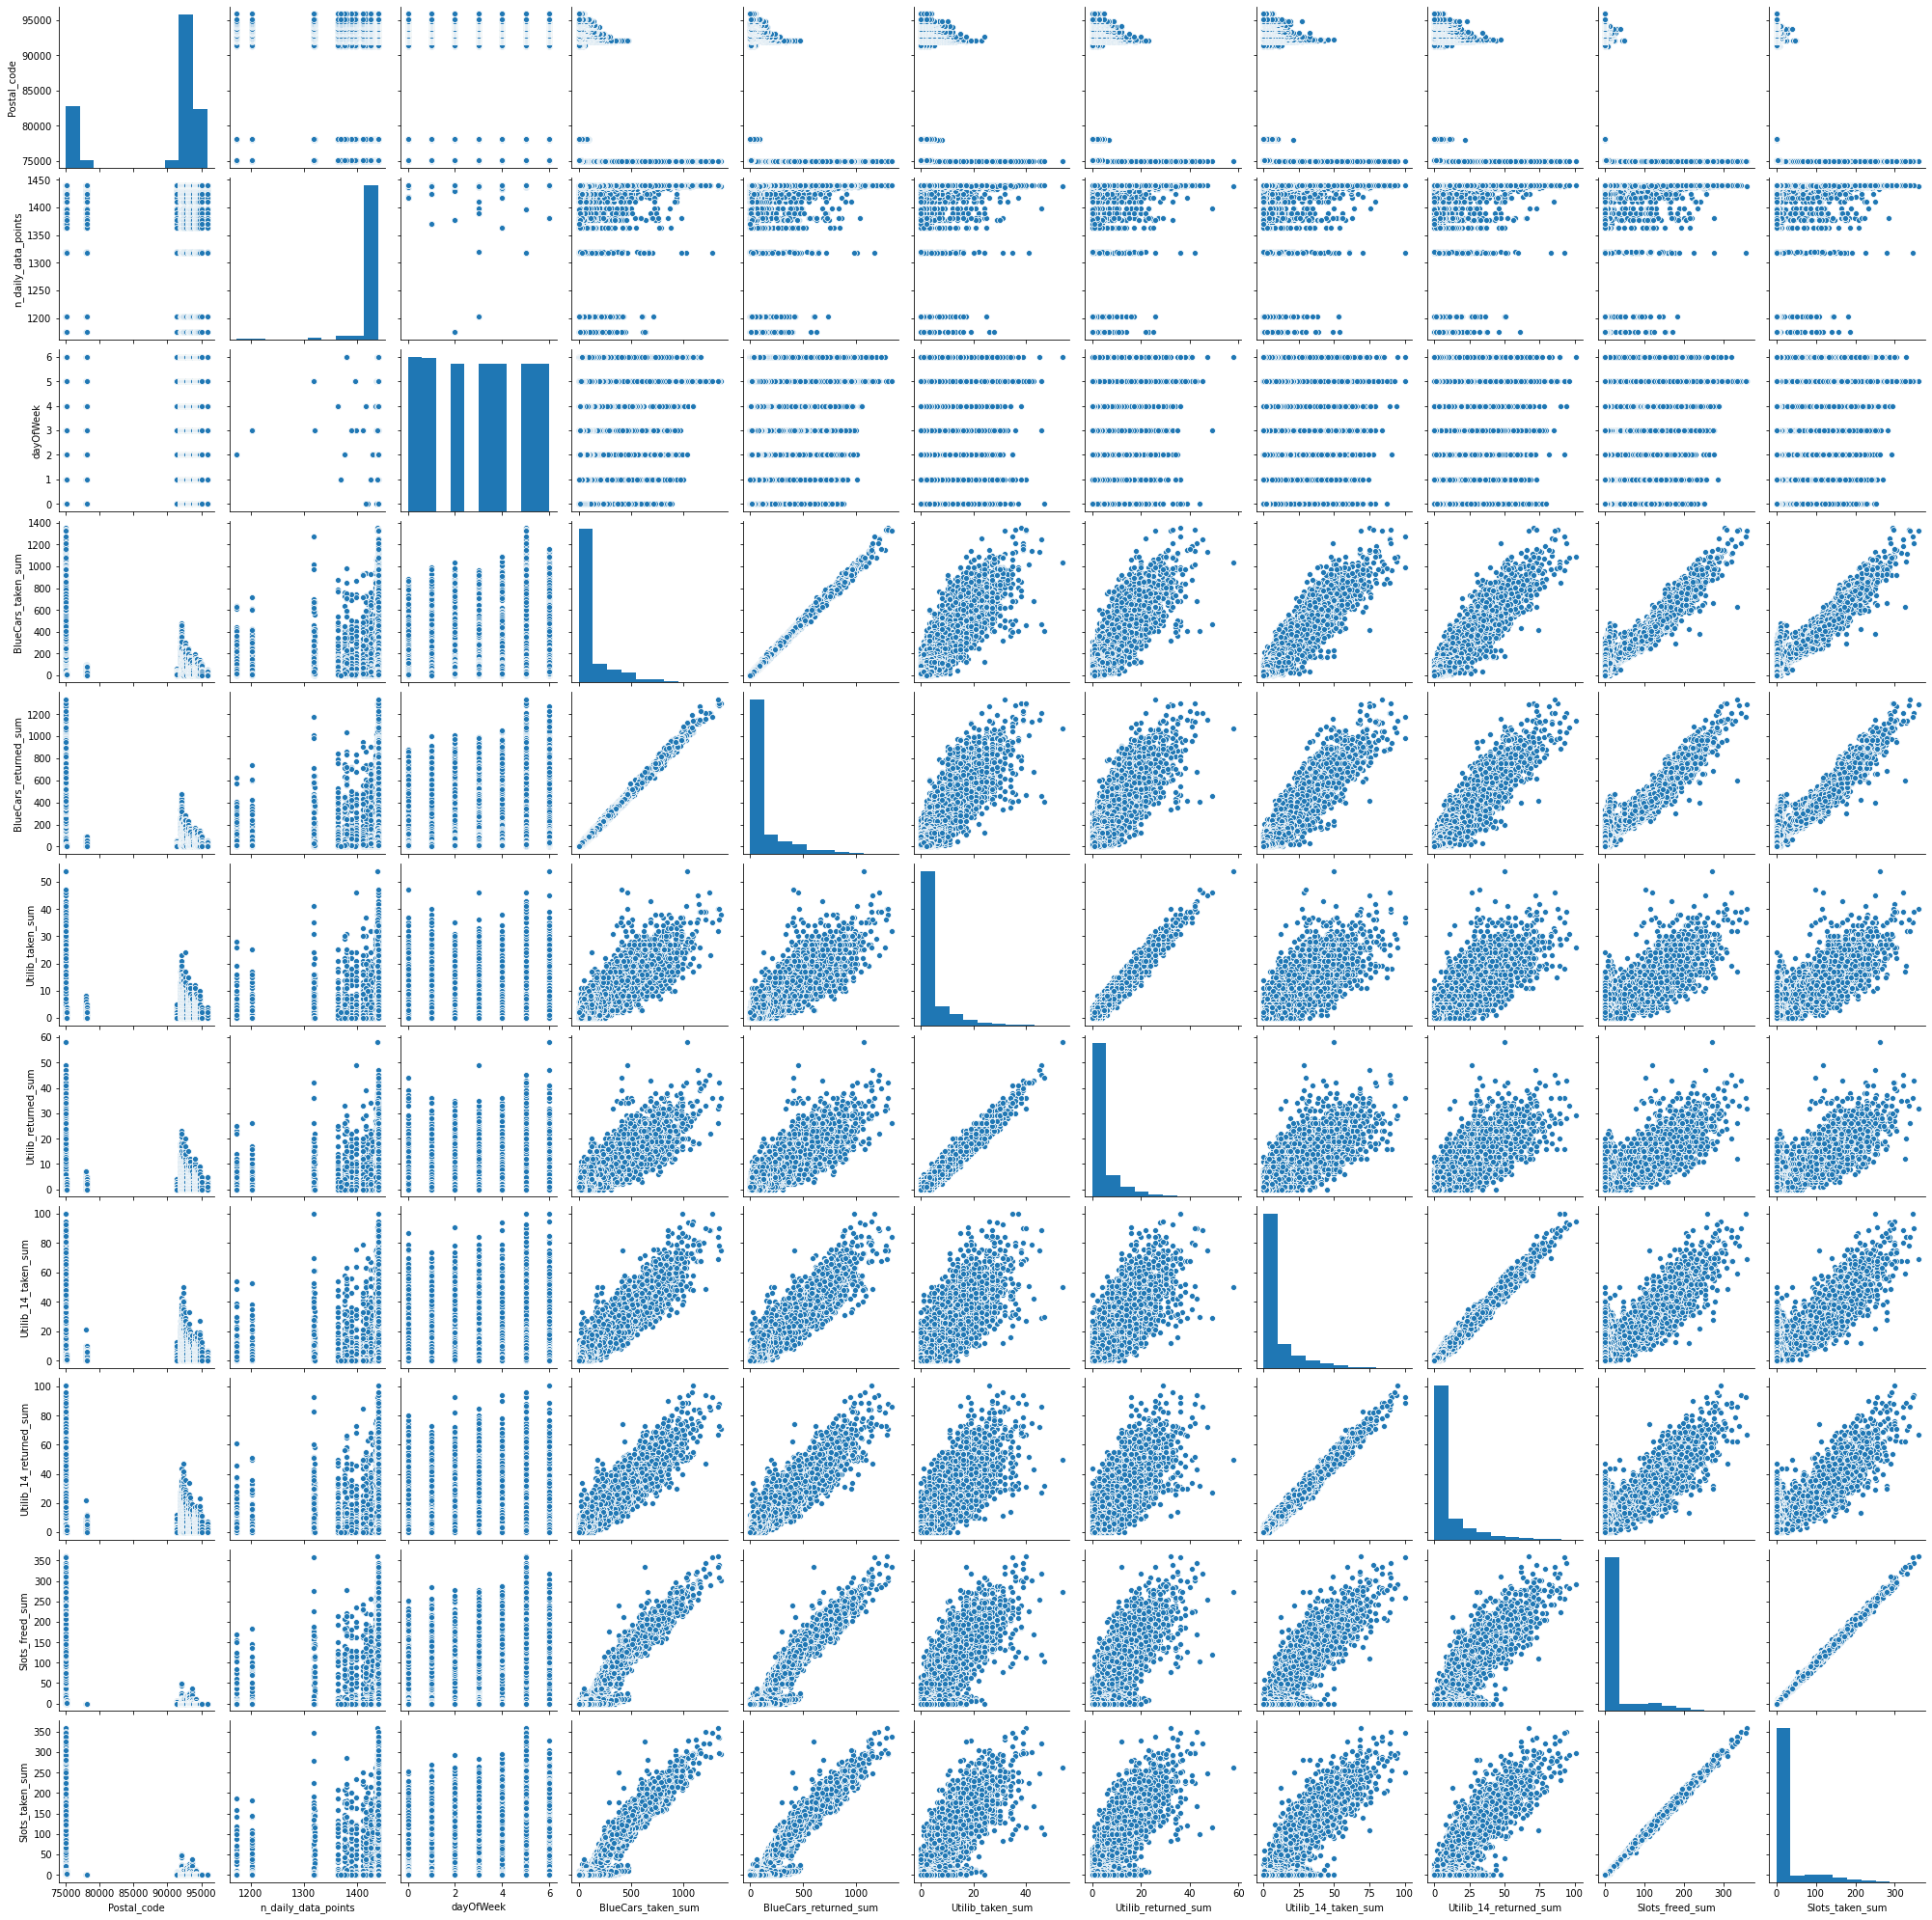

In [53]:
# Ploting the bivariate summaries and recording our observations
#
#
sns.pairplot(auto_lib)
plt.show()

## 7) Implementing the solution